# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/danielvalle/Documents/Coding/Springboard/Human body temperature - EDA/data/human_body_temperature.csv')

In [2]:
# Basically explore the data

print(df.head())
print(df.describe())
print(df.info())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


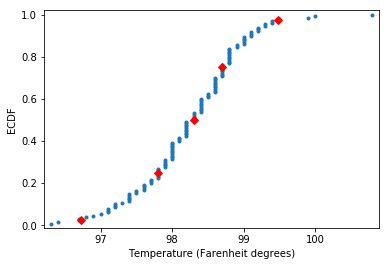

In [3]:
# Compute Empirical Cumulative Distribution Function

#Define a function to create the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Get x and y values for the temperature data
x_temp, y_temp = ecdf(df['temperature'])

# Compute percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])
percentiles_values = np.percentile(df['temperature'], percentiles)

# Plot the ECDF and percentile points
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('Temperature (Farenheit degrees)')
_ = plt.ylabel('ECDF')
_ = plt.plot(percentiles_values, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

### 1. Is the distribution of body temperatures normal?

The 'Human body temperature' histogram suggests a normal distribution; although, the data seems slightly skewed to the right.  

Based on the CDF of the temperature data and the theoretical data below, the distribution of body temperature seems to be normal since it resembles the shape of the theoretical CDF.

Are there other tests to establish that the data is normally distributed?

However, performing two normal distribution tests can help further clarify it. The p-value of the D'Agostino and Pearson normality test does not reach significance. This in turn suggests that there is no reason to reject the null hypothesis that the data comes from a normal distribution. In addition, the result of the Shapiro test also shows no reason to reject the null hypothesis.

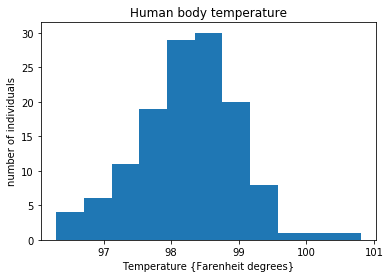

In [4]:
# EDA
obrservations = len(df['temperature'])
n_bins = np.sqrt((obrservations))
n_bins = int(n_bins)

_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('Temperature {Farenheit degrees}')
_ = plt.ylabel('number of individuals')
_ = plt.title('Human body temperature')
plt.show()

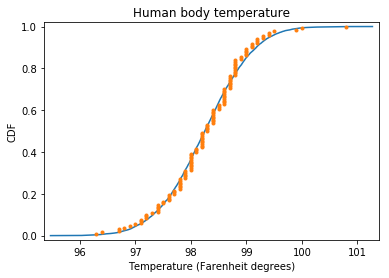

In [5]:
# Compute the mean and standard deviation of the data
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

# Sample out of a normal distribution using this mean and standard deviation
samples = np.random.normal(mu, sigma, 10000)

# Obtain the CDF values out of the samples and of the real data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

# Plot bot CDF
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Temperature (Farenheit degrees)')
_ = plt.ylabel('CDF')
plt.title('Human body temperature')
plt.show()

In [6]:
# Check for nomrmality in the data
import scipy.stats

norm_test = scipy.stats.normaltest(df['temperature'])
print(norm_test)

shapiro_test = scipy.stats.shapiro(df['temperature'])
print('Shapiro test:', shapiro_test)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)
Shapiro test: (0.9865770936012268, 0.233174666762352)


### 2. Is the sample size large? Are the observations independent?

The sample size is large: n > 30. 

The observations are independent of each other since each observation represents a different individual. 

In [7]:
print('Sample size: ', len(df['temperature']))

Sample size:  130


### 3. Is the true population mean really 98.6 degrees F?

Since human body temperature constitutes a continuous function, its mean lies between a range rather than a single point. Thus, it is not possible that the true population mean lies at 98.6 degrees Farenheit. 

Actually, the human body temperature lies within 98.1 and 98.4 Farenheit degrees with a 95% of confidence. 



- Would you use a one-sample or two-sample test? Why?

Since we are looking only at one group, not two groups, we will be using a one-sample test. 



- In this situation, is it appropriate to use the t or z statistic?
Because the sample size is large (n>30), and assuming that the sample mean is relatively close to the population mean, it is appropiate to use the z statistic. 

Assumming as the null hypothesis that the true human body temperature population mean is 98.6, there are reasons to reject this null hypothesis because of the very small p-value < 0.05. 


- Now try using the other test. How is the result be different? Why?

Using the t-statistic, the null hypothesis is also rejected given that the p-value < .05. Using the z- or t-statistic yield the same result (reject null hypothesis) because of the sample size is n > 30. Thus, both tests yield relatively similar results. 

In [8]:
# Calculate body temperature mean interval at the 95% confidence 
import statsmodels.stats.api as sms
print('Body temperature (95% confidence interval):', sms.DescrStatsW(df['temperature']).tconfint_mean())

Body temperature (95% confidence interval): (98.12200290560803, 98.3764586328535)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
# Calculate z score for every observation
#from scipy.stats import zscore
#print(zscore(df['temperature']))

# Calculate the z_score for the sample data: 
# value - mean / std (of sample : std / srt(sample length))
z_score = ( (98.6 - df['temperature'].mean()) / (df['temperature'].std() / np.sqrt(len(df)) ))
print('z_score:', z_score)

p_value = (1 - scipy.stats.norm.cdf(z_score)) * 2
print('p-value:', p_value)

z_score: 5.4548232923645195
p-value: 4.902157013653152e-08


In [10]:
# Calculate the t-statistic p-value
# The z_score is used as the t_score
t_p_value = (1 - scipy.stats.t.cdf(z_score, len(df) - 1)) * 2
print('t-statistic p-value:', t_p_value)

t-statistic p-value: 2.4106320428707306e-07


### 4. Draw a small sample of size 10 from the data and repeat both tests.

- Which one is the correct one to use?
Using this small sample (n = 10) both the z-statistic and the t-statistic obtain p_values below .05, suggesting that both tests reject the null hypothesis. Thus, both are correct when compared to the results of the whole dataset. 



- What do you notice? What does this tell you about the difference in application of the t and z statistic?

The sample size determines which test to use, but in this particular example we do not find clear differences among them. 

In [11]:
# Draw a random sample with size 10
sample_10 = df.sample(10)


# Compute z-statistic
z_score = ( (98.6 - sample_10['temperature'].mean()) / (sample_10['temperature'].std() / np.sqrt(len(sample_10)) ))
print('z_score:', z_score)

p_value = (1 - scipy.stats.norm.cdf(z_score)) * 2
print('p-value:', p_value)

# Compute t-statistic
t_p_value = (1 - scipy.stats.t.cdf(z_score, len(sample_10) - 1)) * 2
print('t-statistic p-value:', t_p_value)

z_score: 0.9604953164109462
p-value: 0.33680598705922327
t-statistic p-value: 0.3618983074717028


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Any temperature value outside the range between 98.1 and 98.4 Farenheit degrees will be considered 'abnormal'. Observe how this 'abnormal' temperatures compared to the distribution of 'normal' temperatures' in the histogram below. 

In [12]:
# Calculate 95% confidence interval of sample mean
print('Body temperature (95% confidence interval):', sms.DescrStatsW(df['temperature']).tconfint_mean())

Body temperature (95% confidence interval): (98.12200290560803, 98.3764586328535)


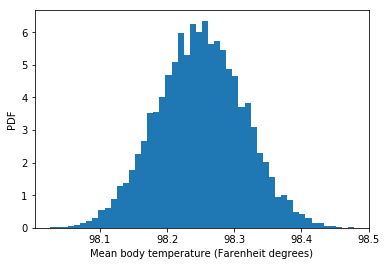

Std of replicates: 0.06419700067815476
Standard error of the mean: 0.06405661469519337
Confidence intervals: [98.12307692 98.37615385]
abnormal temperature from as low as 98.05902030838173 and as high as 98.44021046084903 F degrees


In [13]:
#At what temperature should we consider someone's temperature to be "abnormal"?
#Start by computing the margin of error and confidence interval.

### Compute the PDF and standard error of the mean

# Define a function to get bootstraps
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Define a function to get bootstrap replicates from the data
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Get bootstrap replicates of the temperature data
temp_bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

# Make a histogram of the results
_ = plt.hist(temp_bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Mean body temperature (Farenheit degrees)')
_ = plt.ylabel('PDF')
plt.show()

# Compute standard deviation of the replicates
std_replicates = np.std(temp_bs_replicates)
print('Std of replicates:',std_replicates)

# Compute the standard error of the mean
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print('Standard error of the mean:',sem)


# Compute the 95% confidence interval
conf_int_95 = np.percentile(temp_bs_replicates, [2.5, 97.5])
print('Confidence intervals:', conf_int_95)

# Could it be that an abnormal temperature lies at the addition/difference of the standard error of the mean of the confidence intervals
abnormal_low = conf_int_95[0] - sem
abnormal_high = conf_int_95[1] + sem
print('abnormal temperature from as low as', abnormal_low, 'and as high as', abnormal_high, 'F degrees')

### 6. Is there a significant difference between males and females in normal temperature?


- What test did you use and why?

The z-test was used because the sample size is 65 for both the male and female subsets of data. 


- Write a story with your conclusion in the context of the original problem.

The null hypothesis that there is no difference between the male and female body temperature is rejected (p < 0.01); they are indeed different. 

Overall, this analysis has shown that human body temperature follow a normal distribution. We have found that mean body temperature lies between 98.2 and 98.4 F with 95% confidence; mean human body temperature is not 98.6 F. Any value outside the range of mean body temperature can be considered to be 'abnormal'. Finally, male and female body temperature are significantly different.  

In [14]:
# Divide the dataset into male and female
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']
print('male:', len(male), ' female:', len(female))

# Identify the mean temperature for male and female
print('male temp:', male['temperature'].mean(), ' female temp:', female['temperature'].mean())

male: 65  female: 65
male temp: 98.10461538461537  female temp: 98.39384615384614


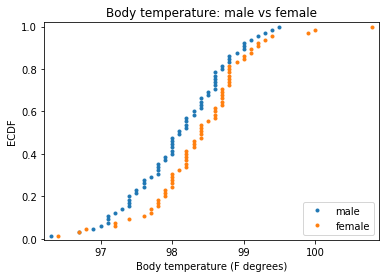

In [15]:
#Compute and plot ECDF for each mean of male and female

#Compute ECDF
x_male, y_male = ecdf(male['temperature'])
x_female, y_female = ecdf(female['temperature'])

#Plot ECDF
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
plt.margins(0.02)

_ = plt.xlabel('Body temperature (F degrees)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('male', 'female'), loc='lower right')
plt.title('Body temperature: male vs female')
plt.show()

In [16]:
# Hypothesis test
# Use a bootstrap analysis to answer whether ot not that difference is significative

## Define a function to get bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

## Define a function to get bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Estimate the difference of the mean of body temperature between male and female
mean_difference = np.mean(male['temperature']) - np.mean(female['temperature'])

#Compute mean of combine data
combined_mean = np.mean(np.concatenate((male['temperature'], female['temperature'])))

# Shift the samples
male_shifted = male['temperature'] - np.mean(male['temperature']) + combined_mean
female_shifted = female['temperature'] - np.mean(female['temperature']) + combined_mean

# Get bootstrap replicates of shifted data
bs_replicates_shifted_male = draw_bs_reps(male_shifted, np.mean, 10000)
bs_replicates_shifted_female = draw_bs_reps(female_shifted, np.mean, 10000)

# Compute difference of means of replicates
shifted_replicate_mean_difference = bs_replicates_shifted_male - bs_replicates_shifted_female

# Compute p-value
p = np.sum(shifted_replicate_mean_difference <= mean_difference) / len(shifted_replicate_mean_difference)
print('p-value =', p)

p-value = 0.0095
